In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import style

In [25]:
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [37]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")

In [38]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Examine the features which contribute to the prediction

### visualizing the data (which feautres do we really matter)

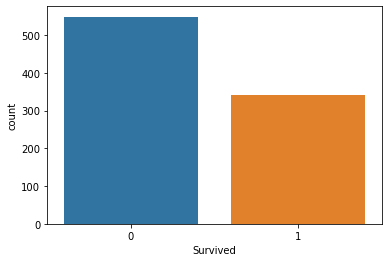

In [40]:
sns.countplot(x="Survived",data=train_df)

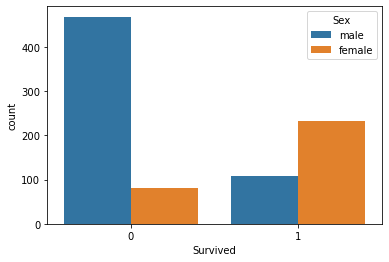

In [41]:
sns.countplot(x="Survived",hue="Sex",data=train_df)

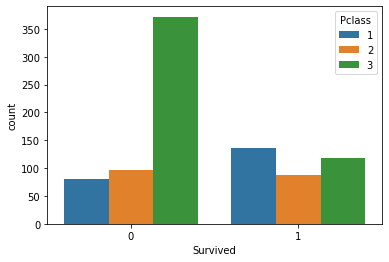

In [42]:
sns.countplot(x="Survived",hue="Pclass",data=train_df) ##3 how class can ccontibute to the precdiction

c:\users\mohit\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


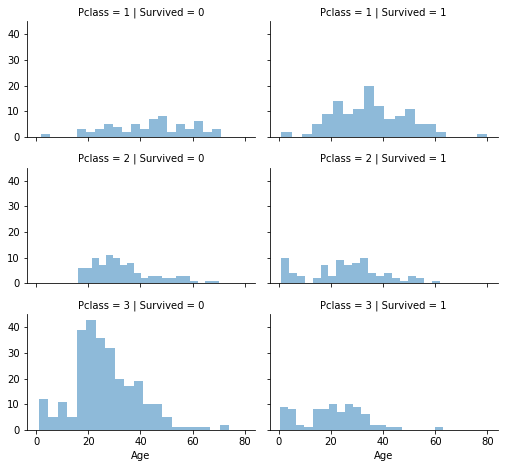

In [43]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

### Data Wrangling

### cleaning the data

### see which column has null values

In [45]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

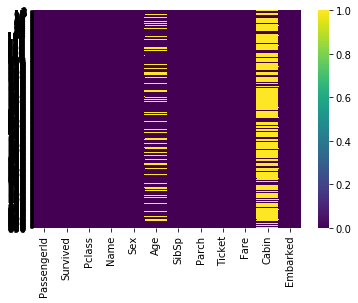

In [46]:
sns.heatmap(train_df.isnull(),yticklabels=True,cmap='viridis') ### where the null values are present 

#### dropping the column which is not required

In [86]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22,1,0,7,0
1,1,1,1,38,1,0,71,1
2,1,3,1,26,0,0,7,0
3,1,1,1,35,1,0,53,0
4,0,3,0,35,0,0,8,0


In [48]:
train_df.isnull().sum() ### No NAn vlues

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [60]:
train_df = train_df.drop(['PassengerId'], axis=1)

In [90]:
test_df.drop("PassengerId",axis=1,inplace=True)

In [91]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22,0,0,7,2
1,3,1,38,1,0,7,0
2,2,0,26,0,0,9,2
3,3,0,35,0,0,8,0
4,3,1,35,1,1,12,0


In [65]:
data=[train_df,test_df]

for dataset in data:
    mean=train_df["Age"].mean()
    std=train_df["Age"].std()
    is_null=dataset["Age"].isnull().sum()
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    
    ### filling the values of age column where Nan is present
    age_slice = dataset["Age"].copy()  ## age_slice is a list containing all the values of age column
    age_slice[np.isnan(age_slice)] = rand_age ## searching for nan values ge column list
    dataset["Age"] = age_slice  # now substitute the age column with age_slice without nan valus
    dataset["Age"] = train_df["Age"].astype(int) #converting to int
    
    
    

In [62]:
for i in train_df["Age"]:
    if i=="NaN":
        i=2
        

In [63]:
age_slice = train_df["Age"].copy()

In [67]:
train_df["Embarked"].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [69]:
common='S'
data=[train_df,test_df]
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common)

In [72]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int32  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
dtypes: float64(1), int32(1), int64(4), object(4)
memory usage: 66.3+ KB


In [73]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    int32  
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(1), int32(1), int64(4), object(5)
memory usage: 34.4+ KB


## if any float data is present you need to convert it into int data

In [74]:
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [75]:
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

### converting th sex data into numeric data

In [82]:
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [84]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

In [85]:
ports={"S":0,"C":1,"Q":2}
data=[train_df,test_df]

for x in data:
    x["Embarked"]=x["Embarked"].map(ports)

### now out data is clened and contains only the numerical values

In [94]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_Class
0,0,3,0,22,1,0,7,0,66
1,1,1,1,38,1,0,71,1,38
2,1,3,1,26,0,0,7,0,78
3,1,1,1,35,1,0,53,0,35
4,0,3,0,35,0,0,8,0,105


In [95]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_Class
0,3,0,22,0,0,7,2,66
1,3,1,38,1,0,7,0,114
2,2,0,26,0,0,9,2,52
3,3,0,35,0,0,8,0,105
4,3,1,35,1,1,12,0,105


In [93]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

In [96]:
X_train=train_df.drop("Survived",axis=1)
Y_train=train_df["Survived"]


In [100]:
print(X_train.shape)

(891, 8)


In [99]:
print(Y_train.shape)

(891,)


In [101]:
X_test=test_df

In [102]:
print(X_test.shape)

(418, 8)


# using different machine learning algorihtms for predictions

# Stochastic Gradient descent

In [103]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)



In [104]:
sgd.fit(X_train,Y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=None,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [105]:
Y_pred = sgd.predict(X_test)


In [107]:
sgd.score(X_train, Y_train)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

In [108]:
print(acc_sgd)

70.59


# Random Forest Classifier

In [116]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

print(acc_random_forest)

In [117]:
print(acc_random_forest)

96.75


# Logistic Regression

In [119]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

c:\users\mohit\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [120]:
print(acc_log)

79.46


# KNN

In [123]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

In [125]:
print(acc_knn)

82.27


In [126]:
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

In [127]:
print(acc_gaussian)

78.79


In [128]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

c:\users\mohit\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [129]:
print(acc_perceptron)

70.15


In [130]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

c:\users\mohit\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [131]:
print(acc_linear_svc)

39.39


In [132]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [133]:
print(acc_decision_tree)

96.75


In [134]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
96.75,Random Forest
96.75,Decision Tree
82.27,KNN
79.46,Logistic Regression
78.79,Naive Bayes
70.59,Stochastic Gradient Decent
70.15,Perceptron
39.39,Support Vector Machines


In [140]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=12, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.69333333 0.78666667 0.78666667 0.77027027 0.81081081 0.83783784
 0.82432432 0.83783784 0.7972973  0.75675676 0.85135135 0.86486486]
Mean: 0.8015015015015016
Standard Deviation: 0.045537329996366414


In [142]:


train_df  = train_df.drop("Parch", axis=1)
test_df  = test_df.drop("Parch", axis=1)

In [145]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

96.75 %


In [144]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)


array([[470,  79],
       [ 95, 247]], dtype=int64)

In [146]:
print(Y_prediction)

[0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 1 1 0 1 0
 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1
 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1
 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0
 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 1 1 0 1 1 0 1 1 0 0 0]
